# Titanic Prediction

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pandas config
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)

# Read the data
train_init = pd.read_csv('./data/train.csv')

## Data Exploratory Analysis

In [3]:
train = train_init.copy()

## Shape
print('\n Shape of train data')
print(train.shape)

## Head
print('\n First 10 rows of train data')
print(train.head(10))

## Info
print('\n Info of train data')
print(train.info())

## Is Null Count
print('\n Null Count of train data')
print(train.isnull().sum())


 Shape of train data
(891, 12)

 First 10 rows of train data
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
5            6

/var/folders/tp/f57ctzbd7xx01q_3pylbmjr80000gn/T/ipykernel_78240/4272340824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=train, stat='percent', palette='viridis')


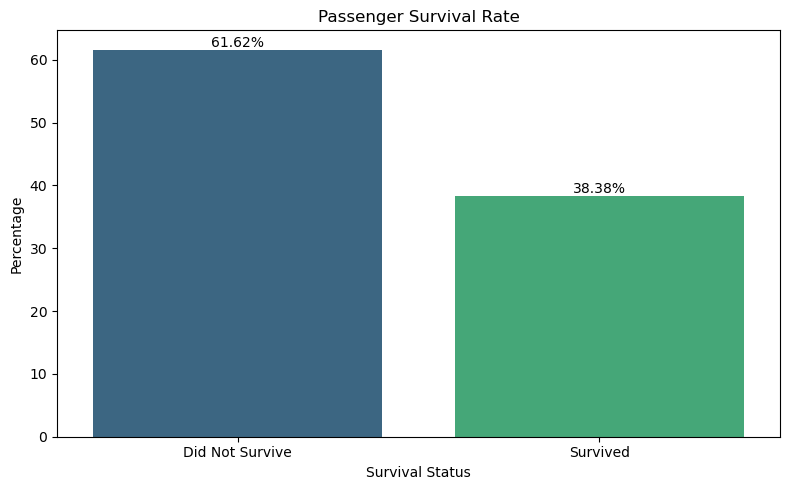

In [4]:
# Create simple survival distribution plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=train, stat='percent', palette='viridis')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')

# Basic labels
plt.title('Passenger Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

plt.tight_layout()

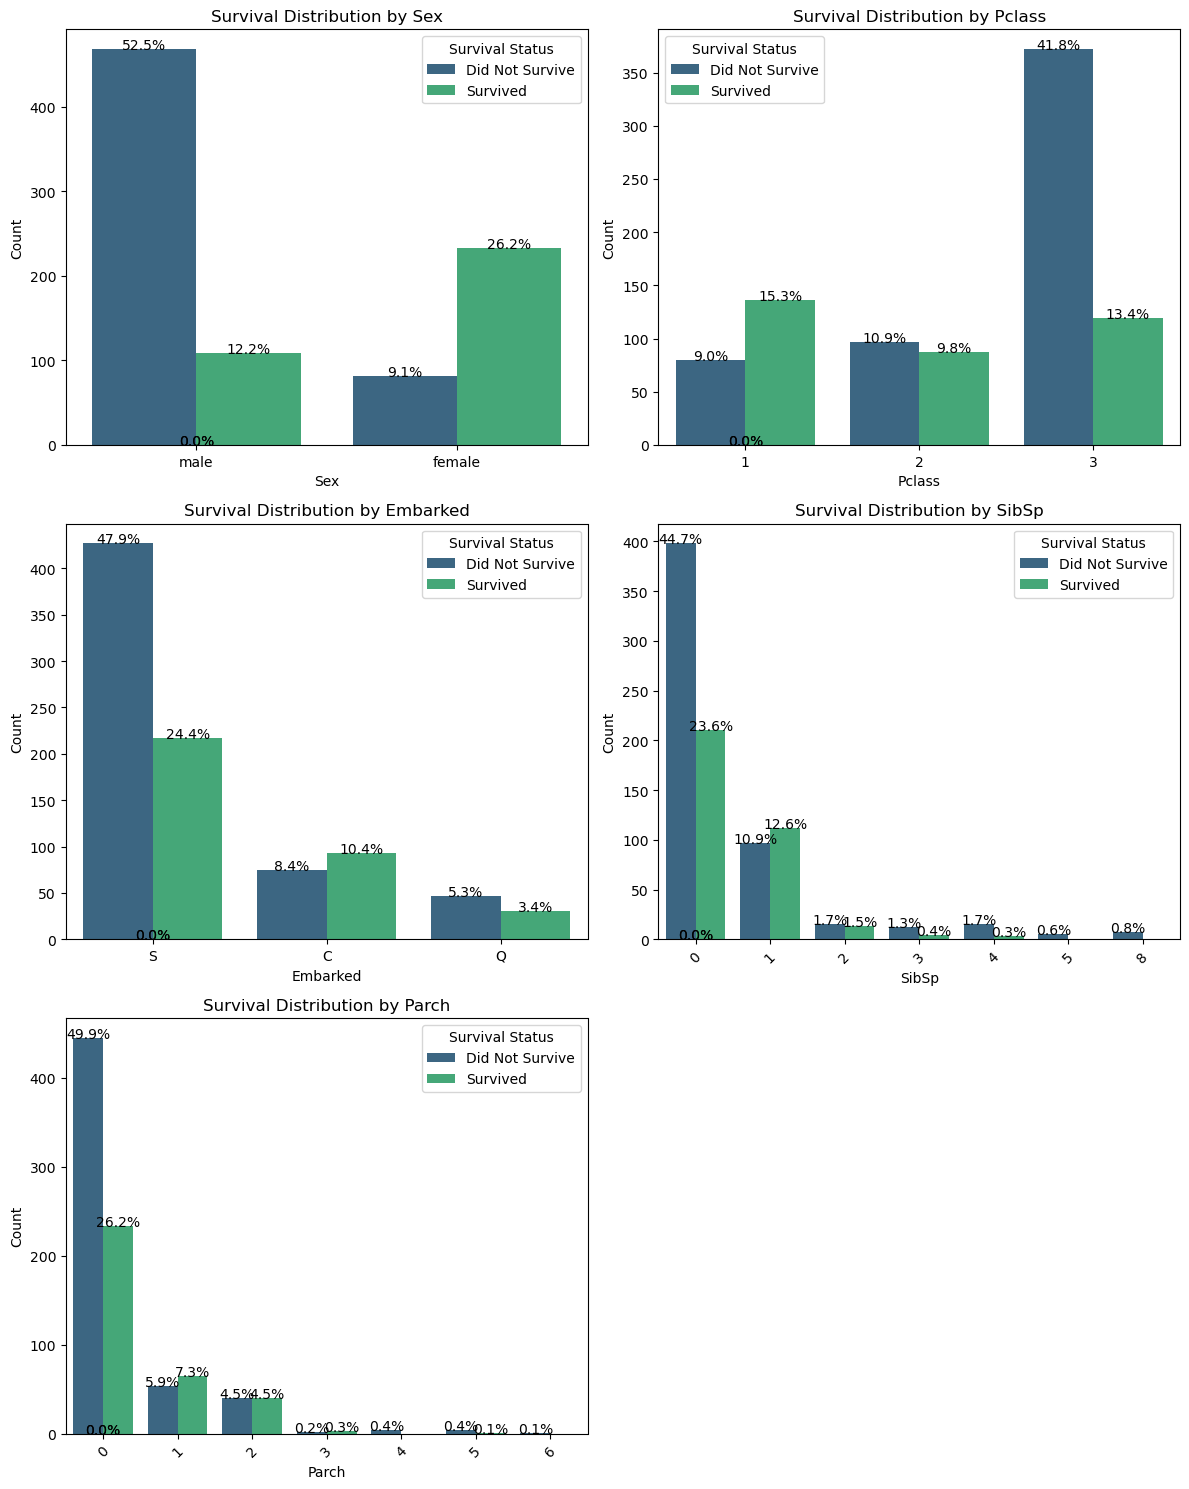

In [5]:

from modules.surv_plot import sv_plot 
sv_plots = sv_plot(train)
sv_plots.sv_countplot(['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch'])

In [6]:
## Feature Engineering
feated_train = train.copy()

feated_train.fillna({'Age': feated_train['Age'].median()}, inplace=True)
feated_train.fillna({'Embarked': feated_train['Embarked'].mode()[0]}, inplace=True)
feated_train.fillna({'Fare': feated_train['Fare'].median()}, inplace=True)


feated_train['FamilySize'] = feated_train['SibSp'] + feated_train['Parch'] + 1 
feated_train['IsAlone'] = (feated_train['FamilySize'] == 1).astype(int)

# Bin Age Groups 0-10
feated_train['AgeBin'] = pd.cut(feated_train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
feated_train['FareBand'] = pd.qcut(feated_train['Fare'], 3, labels=["Low", "Medium", "High"])

# Encoding categorical variables like Sex and Embarked
feated_train['Sex'] = feated_train['Sex'].map({'male': 1, 'female': 0})

# Drop columns
feated_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'FareBand','AgeBin', 'Embarked'], axis=1, inplace=True)

# ### Skilearn preprocessing one hot encoding, label encoding
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# feated_train = pd.get_dummies(feated_train, columns=['Embarked', 'FareBand'], drop_first=False)

# label_encoder = LabelEncoder()
# feated_train['AgeBin'] = label_encoder.fit_transform(feated_train['AgeBin'])

feated_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,1,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,1
887,1,1,0,19.0,0,0,30.0000,1,1
888,0,3,0,28.0,1,2,23.4500,4,0
889,1,1,1,26.0,0,0,30.0000,1,1


In [7]:
## Train data
X = feated_train.copy()
X.drop('Survived', axis=1, inplace=True)

y = feated_train['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/opt/anaconda3/envs/se411/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)


RandomForestClassifier()

In [9]:
from sklearn.metrics import classification_report
y_pred_rfc = rfc_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

